# import required Libraries

In [187]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error


# Data Gathering

In [188]:
df = pd.read_csv('Sales_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [189]:
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.016047,0.019278,0.01676,0.0,0.0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis

## Check Null Values 

In [191]:
(df.isna().sum() / df.shape[0] ) * 100
df.isna().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### 1. Item_Identifier

In [192]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

## 2. Item_Weight

In [193]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

<AxesSubplot:>

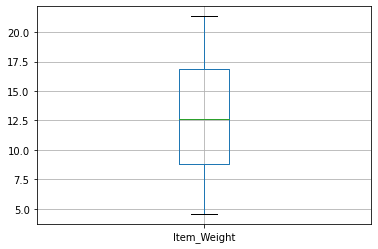

In [194]:
df[['Item_Weight']].boxplot()

In [195]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [196]:
# df.isna().sum()

## 3. Item_Fat_Content

In [197]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [198]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x : x.lower())

In [199]:
df['Item_Fat_Content'].value_counts()

low fat    5201
regular    2889
lf          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [200]:
df['Item_Fat_Content'].replace({'lf':0,'low fat':0,'regular':1,'reg':1},inplace = True)

In [201]:
df['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

## 4. Item_Visibility

In [202]:
df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

<AxesSubplot:>

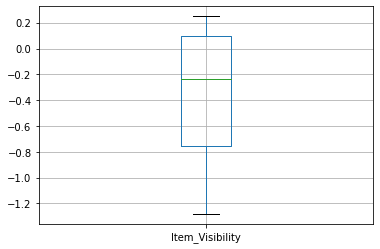

In [247]:
df[['Item_Visibility']].boxplot()

In [245]:
df['Item_Visibility'].loc[df['Item_Visibility'] > 0.25] = 0.10

c:\users\rahul\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [246]:
df['Item_Visibility'].loc[df['Item_Visibility'] > 0.25]

Series([], Name: Item_Visibility, dtype: float64)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


## 5. Item_Type

In [205]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

#### Use one hot encoding 

In [206]:
df_item_type = pd.get_dummies(df['Item_Type'],prefix='Item_Type')
# df_item_type

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


### 6. Item_MRP

In [208]:
df[['Item_MRP']].describe()

,Item_MRP
count,8523.000000
mean,140.992782
std,62.275067
min,31.290000
25%,93.826500
50%,143.012800
75%,185.643700
max,266.888400


<AxesSubplot:>

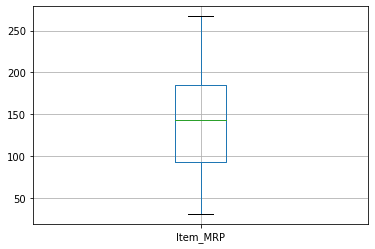

In [209]:
df[['Item_MRP']].boxplot()

### 7. Outlet_Identifier

In [210]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [211]:
df_Outlet_Identifier = pd.get_dummies(df['Outlet_Identifier'],prefix='Outlet_Identifier')
df_Outlet_Identifier

,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,0,0,0,0
8519,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,1,0,0,0
8521,0,0,0,1,0,0,0,0,0,0


## 8. Outlet_Establishment_Year

In [212]:
df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [213]:
df['Outlet_Establishment_Year'] = 2021 - df['Outlet_Establishment_Year']
df['Outlet_Establishment_Year']

0       22
1       12
2       22
3       23
4       34
        ..
8518    34
8519    19
8520    17
8521    12
8522    24
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


## 9. Outlet_Size

In [215]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [216]:
df['Outlet_Size'].mode().loc[0]

'Medium'

In [217]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode().loc[0],inplace = True)

In [218]:
df['Outlet_Size'].fillna('Medium',inplace = True)
df['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace = True)

In [219]:
# df.info()

## 10. Outlet_Location_Typex

In [220]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [221]:
df['Outlet_Location_Type'].replace({'Tier 1':1,'Tier 2':2,'Tier 3':3},inplace = True)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 799.2+ KB


## 11. Outlet_Type

In [223]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [224]:
df_Outlet_Type = pd.get_dummies(df['Outlet_Type'],prefix='Outlet_Type')
df_Outlet_Type

,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 799.2+ KB


### Drop Columns

In [226]:
column_list = ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type']
df.drop(column_list,axis = 1, inplace = True)

In [243]:
# df.drop('Outlet_Est_Year',axis = 1, inplace = True)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 532.8 KB


In [229]:
df_list = [df,df_item_type,df_Outlet_Identifier,df_Outlet_Type]
df = pd.concat(df_list,axis = 1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,22,1,1,3735.1380,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.920,1,0.019278,48.2692,12,1,3,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,22,1,1,2097.2700,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.200,1,0.000000,182.0950,23,1,3,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,34,2,3,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,34,2,3,2778.3834,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,1,0.046982,108.1570,19,1,2,549.2850,1,0,...,0,0,0,1,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,17,0,2,1193.1136,0,0,...,0,0,1,0,0,0,0,1,0,0
8521,7.210,1,0.145221,103.1332,12,1,3,1845.5976,0,0,...,0,0,0,0,0,0,0,0,1,0


In [230]:
# df.info()

# Feature Scaling

## 1. MinMaxScaler

In [171]:
# df.head().T

In [144]:
x1 = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
normal_scaler = MinMaxScaler()
x1_scaled = normal_scaler.fit_transform(df[x1])
x_df = pd.DataFrame(x1_scaled,columns=x1)
x_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.282525,0.048866,0.927507,0.583333
1,0.081274,0.058705,0.072068,1.000000
2,0.770765,0.051037,0.468288,0.583333
3,0.871986,0.000000,0.640093,0.541667
4,0.260494,0.000000,0.095805,0.083333
...,...,...,...,...
8518,0.137541,0.172914,0.777729,0.083333
8519,0.227746,0.143069,0.326263,0.708333
8520,0.359929,0.107148,0.228492,0.791667
8521,0.158083,0.442219,0.304939,1.000000


### Standardization

In [231]:
x1 = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
std_scaler = StandardScaler()
x1_scaled = std_scaler.fit_transform(df[x1])
x_df = pd.DataFrame(x1_scaled,columns=x1)
x_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.841872,-0.970732,1.747454,-0.139541
1,-1.641706,-0.908111,-1.489023,-1.334103
2,1.098554,-0.956917,0.010040,-0.139541
3,1.500838,-1.281758,0.660050,-0.020085
4,-0.929428,-1.281758,-1.399220,1.293934
...,...,...,...,...
8518,-1.418084,-0.181193,1.180783,1.293934
8519,-1.059578,-0.371154,-0.527301,-0.497909
8520,-0.534243,-0.599784,-0.897208,-0.736822
8521,-1.336444,1.532880,-0.607977,-1.334103


In [232]:
df.drop(x1,axis = 1,inplace = True)
df = pd.concat([x_df,df],axis = 1)
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,-0.970732,1.747454,-0.139541,0,1,1,3735.1380,0,0,...,0,0,0,0,0,1,0,1,0,0
1,-1.641706,-0.908111,-1.489023,-1.334103,1,1,3,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.098554,-0.956917,0.010040,-0.139541,0,1,1,2097.2700,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1.500838,-1.281758,0.660050,-0.020085,1,1,3,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.929428,-1.281758,-1.399220,1.293934,0,2,3,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.181193,1.180783,1.293934,0,2,3,2778.3834,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,-1.059578,-0.371154,-0.527301,-0.497909,1,1,2,549.2850,1,0,...,0,0,0,1,0,0,0,1,0,0
8520,-0.534243,-0.599784,-0.897208,-0.736822,0,0,2,1193.1136,0,0,...,0,0,1,0,0,0,0,1,0,0
8521,-1.336444,1.532880,-0.607977,-1.334103,1,1,3,1845.5976,0,0,...,0,0,0,0,0,0,0,0,1,0


In [233]:
# df.info()

# Train Test Split

In [234]:
x = df.drop('Item_Outlet_Sales',axis = 1)
y = df['Item_Outlet_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Train Model

In [235]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

# Evaluation

In [237]:
y_pred = knn_model.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
print("Mean squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

r2_value = r2_score(y_test,y_pred)
print("R Squared Value is :",r2_value)

Mean squared Error : 1478874.6798586543
Root Mean Squared Error : 1216.0899143807806
R Squared Value is : 0.5011080087838949


In [178]:
y_pred_train = knn_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

r2_value = r2_score(y_train,y_pred_train)
print("R Squared Value is :",r2_value)

Mean squared Error : 976369.5825455943
Root Mean Squared Error : 988.1141546125095
R Squared Value is : 0.6631039699473994


# Hyperparameter Tuning

In [238]:
knn_model = KNeighborsRegressor()
hyp = {"n_neighbors":np.arange(2,30),
      'p':[1,2]}
gscv_knn_model = GridSearchCV(knn_model,hyp,cv = 5)
gscv_knn_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [239]:
gscv_knn_model.best_params_

{'n_neighbors': 28, 'p': 2}

In [161]:
knn_model = KNeighborsRegressor()
hyp = {"n_neighbors":np.arange(2,30),
      'p':[1,2]}
rscv_knn_model = RandomizedSearchCV(knn_model,hyp,cv = 5)
rscv_knn_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]})

In [162]:
rscv_knn_model.best_params_

{'p': 2, 'n_neighbors': 8}

### Train model using Optimal Hyperparameter

In [240]:
knn_model = KNeighborsRegressor(n_neighbors=28)
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=28)

In [241]:
# Test Data Evaluation
y_pred = knn_model.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
print("Mean squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

r2_value = r2_score(y_test,y_pred)
print("R Squared Value is :",r2_value)

Mean squared Error : 1279377.8004844207
Root Mean Squared Error : 1131.0958405389088
R Squared Value is : 0.5684074201186831


In [242]:
# Train Data Evaluation
y_pred_train = knn_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

r2_value = r2_score(y_train,y_pred_train)
print("R Squared Value is :",r2_value)

Mean squared Error : 1142225.438277647
Root Mean Squared Error : 1068.7494740478926
R Squared Value is : 0.605875456937577


In [181]:
scaling_list= []
k_value_list = []
p_value_list = []
accuracy_list = []
r2_score_list = []
df_evaluation = pd.DataFrame({'Scaling':scaling_list,'K':k_value_list,'p_val':p_value_list,
                             'RMSE':accuracy_list,'r2_score':r2_score_list})
df_evaluation

,Scaling,K,p_val,RMSE,r2_score


In [255]:
x_test[2:3]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8504,0.0,1.123732,-0.469531,1.532846,0,1,3,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [257]:
y_pred_train = knn_model.predict()
y_pred_train

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 3 while Y.shape[1] == 37